<a href="https://colab.research.google.com/github/nrkfeller/YCBS_258_Winter_2019/blob/master/MNIST_Codethrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


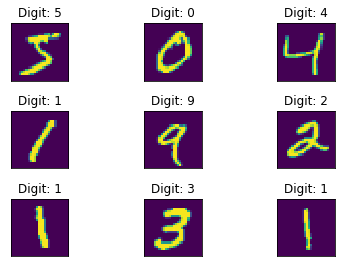

In [5]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title('Digit: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test /= 255

In [0]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
y_train.shape

(60000, 10)

In [0]:
inputs = keras.Input(shape=(784,))

x = Dense(4, activation='relu')(inputs)
y = Dense(4, activation='relu')(x)
outputs = Dense(10, activation='softmax')(y)

model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
h = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 100us/sample - loss: 0.4821 - acc: 0.8590 - val_loss: 0.4545 - val_acc: 0.8653
Epoch 2/20
48000/48000 [==============================] - 5s 99us/sample - loss: 0.4788 - acc: 0.8597 - val_loss: 0.4587 - val_acc: 0.8677
Epoch 3/20
48000/48000 [==============================] - 5s 100us/sample - loss: 0.4776 - acc: 0.8597 - val_loss: 0.4667 - val_acc: 0.8633
Epoch 4/20
48000/48000 [==============================] - 5s 100us/sample - loss: 0.4767 - acc: 0.8624 - val_loss: 0.4710 - val_acc: 0.8592
Epoch 5/20
48000/48000 [==============================] - 5s 98us/sample - loss: 0.4738 - acc: 0.8612 - val_loss: 0.4602 - val_acc: 0.8641
Epoch 6/20
48000/48000 [==============================] - 5s 99us/sample - loss: 0.4729 - acc: 0.8615 - val_loss: 0.4666 - val_acc: 0.8611
Epoch 7/20
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4726 - acc: 0.8621 - val_loss

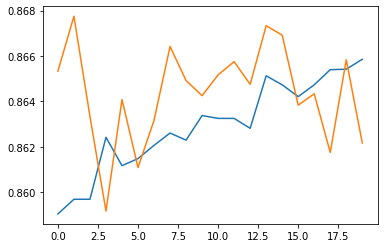

In [33]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])